In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import nltk
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

nltk.download([
     "names",
     "stopwords",
     "state_union",
     "twitter_samples",
     "movie_reviews",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt", ])

[nltk_data] Downloading package names to
[nltk_data]     /Users/meraidandouch/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/meraidandouch/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /Users/meraidandouch/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/meraidandouch/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/meraidandouch/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/meraidandouch/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package

True

In [2]:
# Load the dataset
trainingSet = pd.read_csv("./data/X_train.csv")

# Load test set
submissionSet = pd.read_csv("./data/X_test.csv")

In [3]:
print("3/4 reviews are Scored 3-5")
trainingSet[trainingSet['Tier']==1].count()

3/4 reviews are Scored 3-5


Id                        1527834
ProductId                 1527834
UserId                    1527834
HelpfulnessNumerator      1527834
HelpfulnessDenominator    1527834
                           ...   
what                      1527834
with                      1527834
you                       1527834
Tier                      1527834
Polarity                  1527834
Length: 82, dtype: int64

Text(0.5, 1.0, 'Count of Scores')

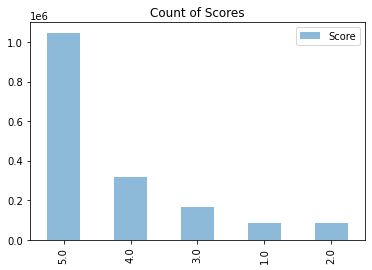

In [4]:
trainingSet['Score'].value_counts().plot(kind = 'bar', legend = True, alpha = .5)
plt.title("Count of Scores")

Text(0.5, 1.0, 'Top 25 products with a a lot of reviews')

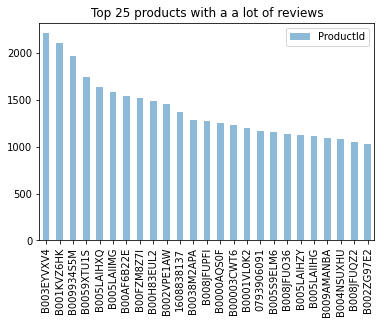

In [5]:
trainingSet['ProductId'].value_counts().nlargest(25).plot(kind = 'bar', legend = True, alpha = 0.5)
plt.title('Top 25 products with a a lot of reviews')

Text(0.5, 1.0, 'Bottom 25 products with a not a lot of reviews')

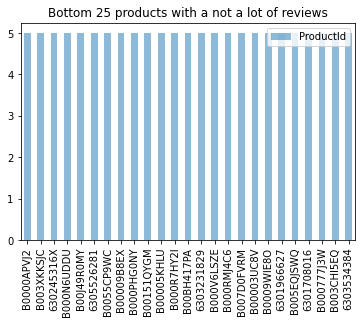

In [6]:
trainingSet['ProductId'].value_counts().nsmallest(25).plot(kind = 'bar', legend = True, alpha = 0.5)
plt.title('Bottom 25 products with a not a lot of reviews')

Text(0.5, 1.0, 'Top 25 Reviewers')

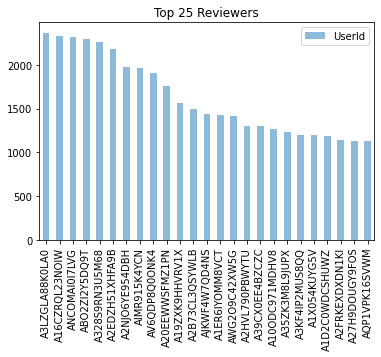

In [7]:
trainingSet['UserId'].value_counts().nlargest(25).plot(kind = 'bar', legend = True, alpha = 0.5)
plt.title('Top 25 Reviewers')

Text(0.5, 1.0, 'Bottom 25 Reviewers')

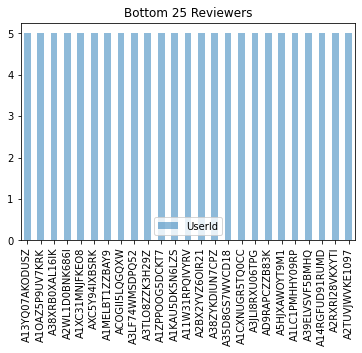

In [8]:
trainingSet['UserId'].value_counts().nsmallest(25).plot(kind = 'bar', legend = True, alpha = 0.5)
plt.title('Bottom 25 Reviewers')

Text(0.5, 1.0, 'HelpfulnessNumerator/ HelpfulnessNumerator  per score')

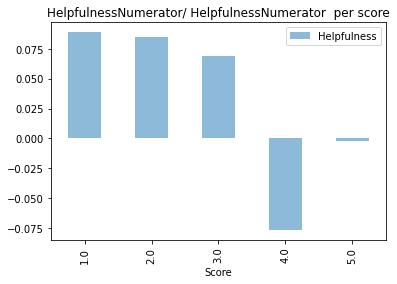

In [27]:
trainingSet[['Score', 'Helpfulness']].groupby('Score').mean().plot(kind = 'bar', legend = True, alpha = 0.5)
plt.title("HelpfulnessNumerator/ HelpfulnessDeniominator per score")

Text(0.5, 1.0, 'Number of people who found the amazon movie review helpful per score')

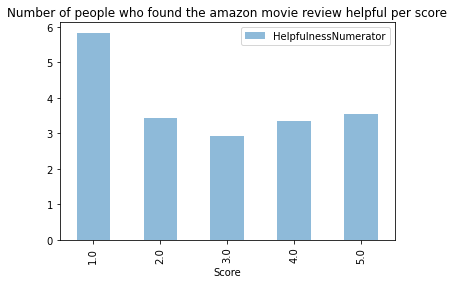

In [26]:
trainingSet[['Score', 'HelpfulnessNumerator']].groupby('Score').mean().plot(kind = 'bar', legend = True, alpha = 0.5)
plt.title("Number of people who found the amazon movie review helpful per score")

Text(0.5, 1.0, 'Mean Sentiment Scores for each Score')

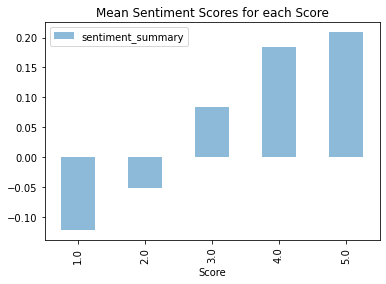

In [33]:
trainingSet[['Score', 'sentiment_summary']].groupby('Score').mean().plot(kind = 'bar', legend = True, alpha = 0.5)
plt.title("Mean Sentiment Scores for each Score")


Text(0.5, 1.0, 'Count of Polarity Bins (0 or 1) for Each Score')

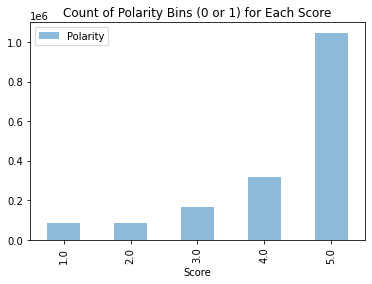

In [36]:
trainingSet[['Score', 'Polarity']].groupby('Score').mean().plot(kind = 'bar', legend = True, alpha = 0.5)
plt.title("Count of Polarity Bins (0 or 1) for Each Score")

Text(0.5, 1.0, 'Top 25 best rated products')

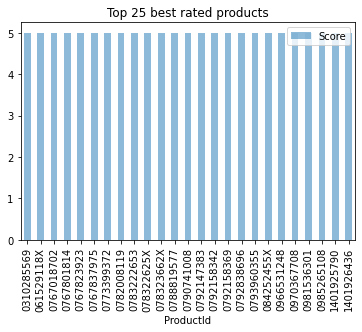

In [10]:
trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nlargest(25, 'Score').plot(kind = 'bar', legend = True, alpha = 0.5)
plt.title("Top 25 best rated products")

Text(0.5, 1.0, 'Bottom 25 best rated products')

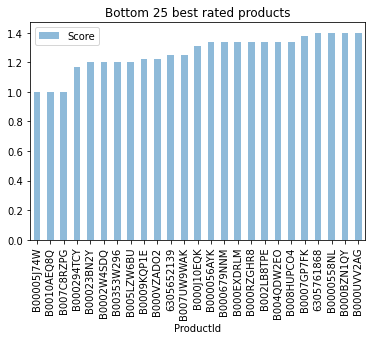

In [11]:
trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nsmallest(25, 'Score').plot(kind = 'bar', legend = True, alpha = 0.5)
plt.title("Bottom 25 best rated products")

Text(0.5, 1.0, 'Top 25 kindest reviewers')

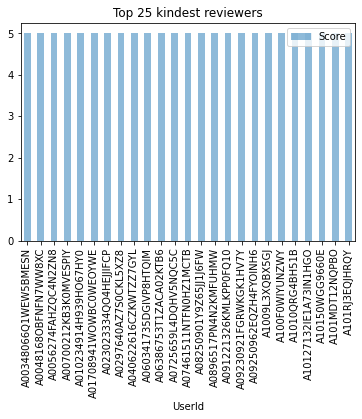

In [12]:
trainingSet[['Score', 'UserId']].groupby('UserId').mean().nlargest(25, 'Score').plot(kind = 'bar', legend = True, alpha = 0.5)
plt.title("Top 25 kindest reviewers")

Text(0.5, 1.0, 'Top 25 harshest reviewers')

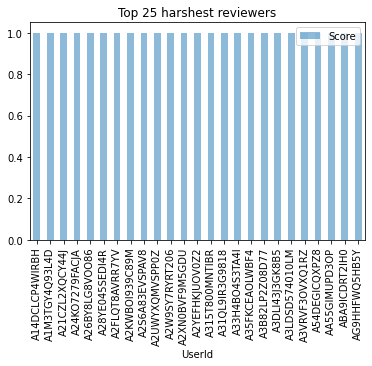

In [13]:
trainingSet[['Score', 'UserId']].groupby('UserId').mean().nsmallest(25, 'Score').plot(kind = 'bar', legend = True, alpha = 0.5)
plt.title("Top 25 harshest reviewers")

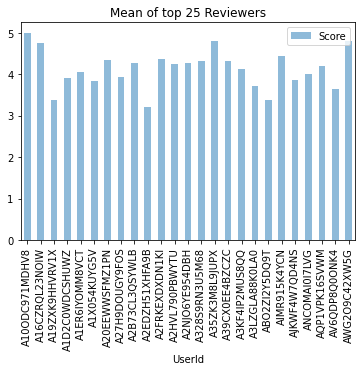

In [14]:
trainingSet[trainingSet['UserId'].isin(trainingSet['UserId'].value_counts().nlargest(25).index.tolist())][['Score', 'UserId']].groupby('UserId').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean of top 25 Reviewers")
plt.show()

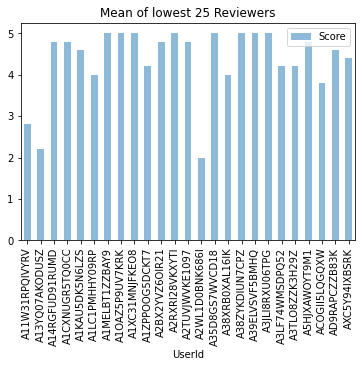

In [15]:
trainingSet[trainingSet['UserId'].isin(trainingSet['UserId'].value_counts().nsmallest(25).index.tolist())][['Score', 'UserId']].groupby('UserId').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean of lowest 25 Reviewers")
plt.show()

<AxesSubplot:xlabel='Hour'>

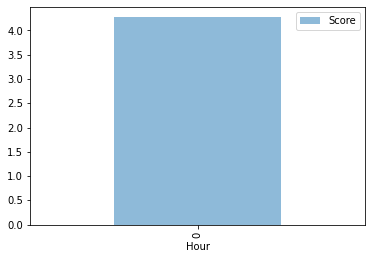

In [16]:
trainingSet['Date'] = pd.to_datetime(trainingSet['Time'], unit = 's')
trainingSet['Month'] = trainingSet['Date'].dt.month
trainingSet['Year'] = trainingSet['Date'].dt.year
trainingSet['Hour'] = trainingSet['Date'].dt.hour
trainingSet[['Score', 'Hour']].groupby('Hour').mean().plot(kind = 'bar', legend = True, alpha = 0.5)

Text(0.5, 1.0, 'Mean score per month')

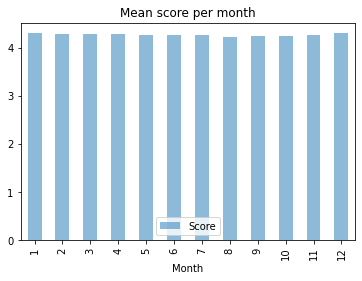

In [17]:
trainingSet[['Score', 'Month']].groupby('Month').mean().plot(kind = 'bar', legend = True, alpha = 0.5)
plt.title('Mean score per month')

Text(0.5, 1.0, 'Mean score per Year')

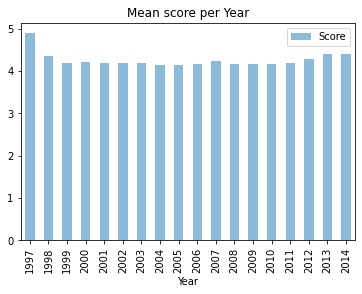

In [18]:
trainingSet[['Score', 'Year']].groupby('Year').mean().plot(kind = "bar", legend = True, alpha = 0.5)
plt.title('Mean score per Year')

In [19]:
trainingSet['ReviewLength'] = trainingSet.apply(lambda row : len(row['Text'].split()) if type(row['Text']) == str else 0, axis = 1)
trainingSet['SummaryLength'] = trainingSet.apply(lambda row : len(row['Summary'].split()) if type(row['Summary']) == str else 0, axis = 1)

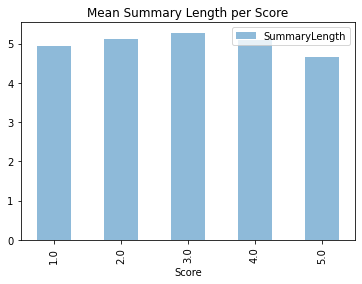

In [20]:
trainingSet[['Score', 'SummaryLength']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean Summary Length per Score")
plt.show()

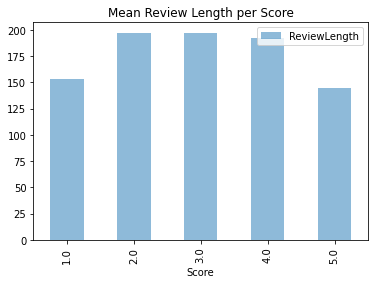

In [21]:
trainingSet[['Score', 'ReviewLength']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean Review Length per Score")
plt.show()

<AxesSubplot:xlabel='Score'>

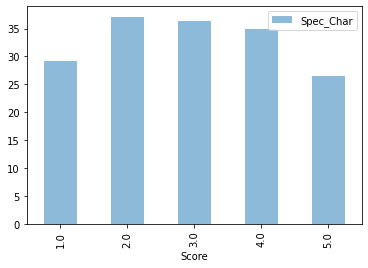

In [37]:
trainingSet[['Score', 'Spec_Char']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)

<AxesSubplot:xlabel='Score'>

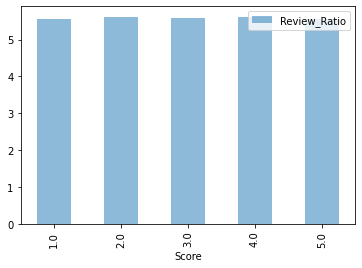

In [38]:
trainingSet[['Score', 'Review_Ratio']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)

<AxesSubplot:xlabel='Score'>

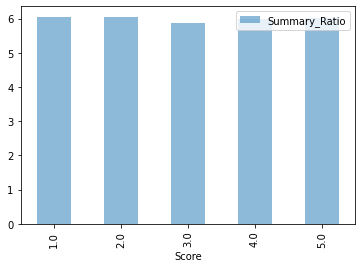

In [39]:
trainingSet[['Score', 'Summary_Ratio']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)

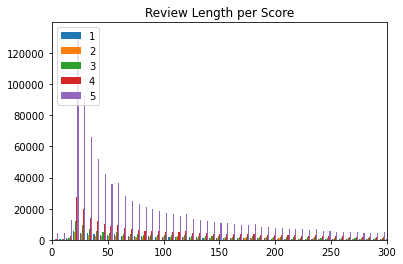

In [22]:
colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'darkorange', 'indigo', 'pink', 'grey']
fig, ax = plt.subplots()
reviews = []
for i in range(1, 6):
    score = trainingSet.where(trainingSet['Score'] == float(i))
    reviews.append(score['ReviewLength'].dropna())

plt.hist(reviews, bins=1000, label=list(range(1, 6)))
ax.legend(loc='upper left')
plt.xlim(0, 300)
plt.title("Review Length per Score")
plt.show()  

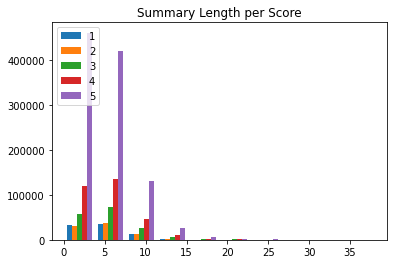

In [23]:
fig, ax = plt.subplots()
reviews = []
for i in range(1, 6):
    score = trainingSet.where(trainingSet['Score'] == float(i))
    reviews.append(score['SummaryLength'].dropna())

plt.hist(reviews, bins=10, label=list(range(1, 6)))
ax.legend(loc='upper left')
plt.title("Summary Length per Score")
plt.show()


!                   28184
the                 15756
a                   12057
,                   11592
.                   11234
                    ...  
verite                  1
avant-garde             1
over-exaggerated        1
craziness               1
puuuuhhhlease           1
Length: 25157, dtype: int64
top words:  !                   28184.0
the                     NaN
a                       NaN
,                   11592.0
.                   11234.0
                     ...   
verite                  1.0
avant-garde             1.0
over-exaggerated        1.0
craziness               1.0
puuuuhhhlease           1.0
Length: 25157, dtype: float64
Top 100 words for Score =  1
['!', ',', '.', 'movie', '?', '...', "n't", 'bad', "'s", 'worst', 'boring', 'waste', 'time', 'film', 'ever', "''", '``', 'good', 'terrible', 'horrible', 'awful', '-', 'dvd', 'like', 'money', '....', '&', ':', 'really', 'great', 'star', 'stars', 'movies', 'stupid', ';', 'could', 'watch', 'get', '(', 'poor',

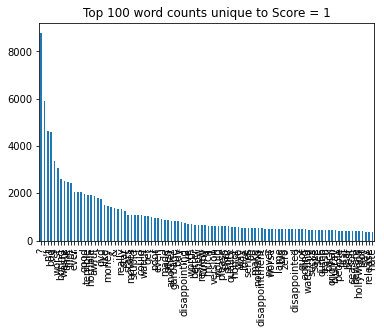

Top 100 words sort of unique to Score =  2
['...', '?', "'s", 'good', "n't", 'bad', 'film', '``', "''", 'boring', 'disappointing', 'better', 'like', '-', 'much', '&', '....', ';', 'story', ':', 'stars', 'dvd', 'time', 'really', 'could', 'poor', '(', ')', 'best', '2', 'ok', 'funny', 'another', 'watch', 'waste', 'review', 'get', 'worth', 'worst', 'two', 'nothing', 'plot', 'little', 'disappointed', "'", 'love', 'first', 'acting', 'slow', 'disappointment', 'quot', 'way', 'series', 'pretty', 'terrible', 'original', 'interesting', 'well', 'movies', 'quality', 'big', 'show', 'money', 'comedy', 'would', '--', 'book', 'even', 'weak', 'horror', '*', 'dull', 'version', 'action', 'long', 'expected', '..', 'enough', '.....', 'see', 'stupid', "'ve", 'make', 'old', 'predictable', 'lame', 'okay', 'overrated', 'made', 'star', 'mediocre', 'still', 'fun', 'horrible', 'oh', 'season', 'seen', 'special', 'ever', 'awful']



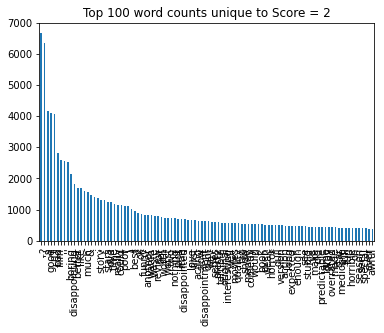

Top 100 words sort of unique to Score =  3
['good', '...', "'s", '?', 'film', "''", '``', 'bad', "n't", 'ok', 'better', 'fun', '-', 'story', '&', 'okay', 'stars', ';', 'dvd', 'like', ':', 'best', 'interesting', 'much', 'could', 'entertaining', '(', ')', 'funny', 'little', '....', 'decent', 'still', 'worth', 'first', 'review', 'love', 'pretty', 'watch', 'action', 'really', '3', 'time', 'comedy', 'well', 'series', 'average', 'classic', "'", 'season', 'show', 'disappointing', 'flick', 'expected', 'nice', 'quot', 'original', 'horror', '2', '--', 'bit', 'nothing', 'movies', 'another', 'acting', 'get', 'plot', 'would', 'old', 'cute', 'three', 'slow', '*', 'enough', 'book', 'version', 'quality', 'enjoyable', 'new', '..', 'see', 'poor', 'way', 'fans', 'special', 'star', 'quite', 'blu-ray', 'thriller', 'long', 'two', 'ending', 'watching', '.....', 'mediocre', "'ve", 'predictable', 'kids', 'say', 'different']



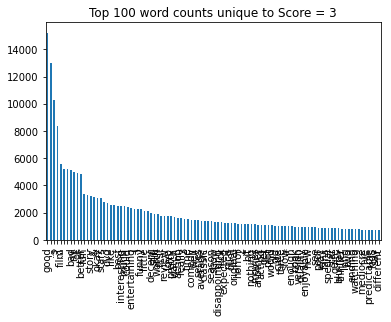

Top 100 words sort of unique to Score =  4
['good', '...', "'s", 'film', "''", '``', '?', 'fun', 'better', 'story', '&', 'best', 'classic', '-', 'funny', "n't", 'dvd', 'love', ':', ';', 'like', ')', 'entertaining', '(', 'still', 'series', 'stars', 'action', 'bad', 'show', 'well', 'excellent', 'interesting', 'season', 'time', 'worth', 'comedy', 'pretty', 'nice', '....', 'review', 'enjoyable', 'first', 'little', 'really', 'watch', 'family', 'flick', 'horror', 'movies', 'another', "'", 'thriller', 'quot', 'old', 'much', 'cute', 'new', 'life', 'original', 'drama', '--', 'see', 'liked', 'done', '2', 'get', 'back', 'blu-ray', '4', 'could', 'solid', 'expected', 'star', 'two', 'version', 'way', 'different', '*', '3', 'wonderful', 'set', 'surprisingly', 'collection', 'fans', 'four', 'acting', 'book', 'real', 'decent', 'true', 'beautiful', 'dark', 'look', 'would', 'watching', 'ever', 'films', '..', 'kids']



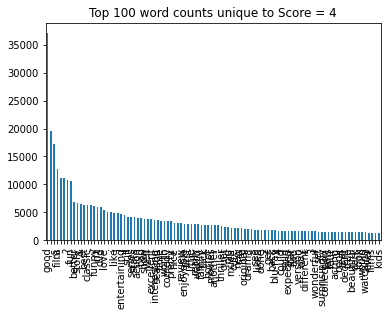

Top 100 words sort of unique to Score =  5
['!', 'movie', 'great', ',', '.', 'best', 'love', 'film', '?', 'classic', '``', "''", 'dvd', 'series', 'excellent', 'show', '&', 'fun', '-', 'season', "n't", 'ever', 'story', 'funny', ':', 'time', 'awesome', 'movies', 'better', ')', ';', 'wonderful', '(', 'stars', 'like', 'favorite', 'must', 'another', 'loved', 'family', '....', 'still', 'comedy', 'see', 'watch', 'amazing', 'well', 'really', 'action', 'review', 'first', 'tv', 'collection', 'get', 'fantastic', '2', 'old', 'beautiful', 'worth', 'bad', 'entertaining', 'quot', "'", 'five', 'new', 'life', 'made', 'set', 'horror', 'true', 'films', '*', 'masterpiece', 'blu-ray', '--', 'christmas', 'brilliant', 'back', 'perfect', 'wow', 'star', 'much', 'never', 'original', 'finally', 'way', 'fan', 'real', 'greatest', 'hilarious', 'seen', 'little', 'drama', 'version', '5', '1', 'two', '3', 'nice', 'buy']



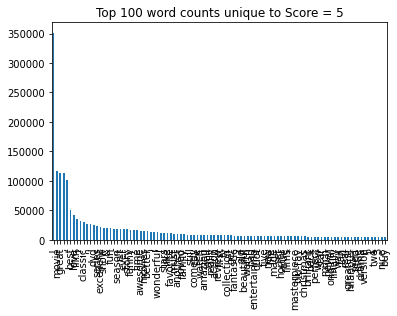

In [24]:
topWords = []
for i in range(1,6):
    words = pd.Series(word_tokenize(' '.join(trainingSet.where(trainingSet['Score'] == float(i))['Summary'].dropna()).lower())).value_counts()
    print(words)
    topWordsForScore = words.where(~words.index.isin(stopwords.words()))
    print("top words: ", topWordsForScore)
    print("Top 100 words for Score = ", i)
    print(topWordsForScore.nlargest(100).index.tolist())
    print()
    topWords.append(topWordsForScore)

for i in range(len(topWords)):
    fig, ax = plt.subplots()
    allExcepti = topWords[:i] + topWords[i+1:]
    flattened = pd.concat(allExcepti)
    topWords[i] = topWords[i].where(~topWords[i].index.isin(flattened.nlargest( ).index.tolist()))
    print("Top 100 words sort of unique to Score = ", i+1)
    print(topWords[i].nlargest(100).index.tolist())
    print()
    topWords[i].nlargest(100).plot(kind='bar', ax=ax)
    plt.title("Top 100 word counts unique to Score = " + str(i+1))
    plt.show()

<AxesSubplot:xlabel='Score'>

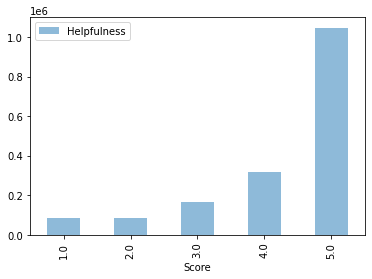

In [25]:
trainingSet[['Score', 'Helpfulness']].groupby('Score').count().plot(kind = 'bar', legend = True, alpha = 0.5)


Text(0.5, 1.0, "Mean average of 'good' words in text for each score")

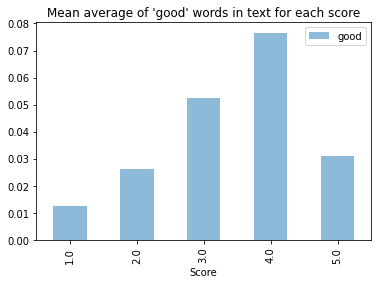

In [49]:
trainingSet[['Score', 'good']].groupby('Score').mean().plot(kind = 'bar', legend = True, alpha = 0.5)
plt.title("Mean average of 'good' words in text for each score")

<AxesSubplot:xlabel='Score'>

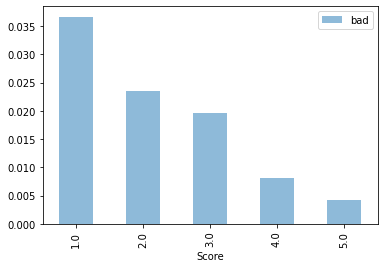

In [47]:
trainingSet[['Score', 'bad']].groupby('Score').mean().plot(kind = 'bar', legend = True, alpha = 0.5)

<AxesSubplot:xlabel='Score'>

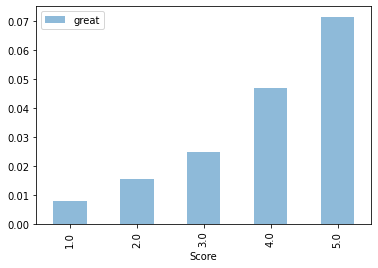

In [52]:
trainingSet[['Score', 'great']].groupby('Score').mean().plot(kind = 'bar', legend = True, alpha = 0.5)